In [1]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# Loading and Transforming Data 

In [2]:
#Loading data
communitydata = pd.read_csv(r'C:\Users\Callum\Documents\cab420-assignment1a\CAB420Assignment1A\communities.csv')
print(communitydata.head())
#Removing whitespaces
communitydata.rename(columns=lambda x: x.strip(), inplace=True)
communitydata = communitydata.rename(columns=lambda x: x.strip())
#counting Questionmarks
questionmark_count = communitydata['PctPolicWhite'].value_counts()['?']
num_rows, num_cols = communitydata.shape
print("Number of ?:", questionmark_count, "\nTotal number of rows:", num_rows, "\nRows containing data:" ,
      num_rows - questionmark_count)

# Y = wine['ViolentCrimesPerPop']
# X_train,X_test, Y_train,  Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

    state   county   community   communityname string   fold    population   \
0        8        ?           ?          Lakewoodcity       1          0.19   
1       53        ?           ?           Tukwilacity       1          0.00   
2       24        ?           ?          Aberdeentown       1          0.00   
3       34        5       81440   Willingborotownship       1          0.04   
4       42       95        6096     Bethlehemtownship       1          0.01   

    householdsize    racepctblack    racePctWhite    racePctAsian   ...  \
0             0.33            0.02            0.90            0.12  ...   
1             0.16            0.12            0.74            0.45  ...   
2             0.42            0.49            0.56            0.17  ...   
3             0.77            1.00            0.08            0.12  ...   
4             0.55            0.02            0.95            0.09  ...   

    LandArea    PopDens    PctUsePubTrans    PolicCars    PolicOperBudg   

As can be seen there are only 319 rows containing actually data in PctPolicWhite and many other columns. Due to this, we have decided to remove these columns.

In [3]:
#Get all columns
column_names = communitydata.columns
#Remove columns with "?"
questionmark_count = 0

communitydata = communitydata.drop(columns=['fold', 'state', 'communityname string', 'community', 'county'])
column_names = communitydata.columns
column_with_lessthan_fifty_questionmarks = []

print("Remaining columns: ",list(column_names))
for index, elem in enumerate(column_names):
    try:
        questionmark_count = communitydata[elem].value_counts()['?']
        #need to look at this, some with only 50 ?
        #Check column of question marks, if it is greater than 50, remove whole column
        if(questionmark_count > 50):
            
            del communitydata[elem]
        elif(questionmark_count <=50 or questionmark_count > 0):
            column_with_lessthan_fifty_questionmarks.append(elem)
            
    except:
        pass
        
column_names = communitydata.columns
# print(len(column_names))



Remaining columns:  ['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargH

In [4]:
#print out all columns with less than 50 '?'
print(column_with_lessthan_fifty_questionmarks)

['OtherPerCap']


In [5]:
# remove the rows that are afflicted by columns less than 50 '?'
communitydata = communitydata[communitydata.OtherPerCap != '?']

Model 1 RMSE = 0.14117668570708608
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     27.67
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          4.48e-235
Time:                        14:30:59   Log-Likelihood:                 802.63
No. Observations:                1195   AIC:                            -1403.
Df Residuals:                    1094   BIC:                            -889.6
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

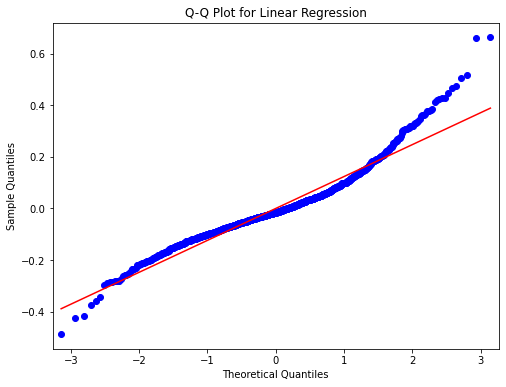

In [6]:
#Split data into train test validation
# Reference - 60%, 20%, 20% Split for test, val, train
y = communitydata['ViolentCrimesPerPop']
X = communitydata.drop('ViolentCrimesPerPop', axis=1)

def trainingdata (predictors, predictionColumn):
    X_train, X_test, y_train, y_test = train_test_split(predictors, predictionColumn, test_size=0.2, random_state=1)
    X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

    # Casting to Array type
    y_train = np.array(y_train, dtype=np.float64)
    X_train = np.array(X_train, dtype=np.float64)
    Y_val = np.array(Y_val, dtype=np.float64)
    X_val = np.array(X_val, dtype=np.float64)
    # Adding constants to the model
    X_val = sm.add_constant(X_val)
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    # fit the model without any regularisation
    model_1_fit = model.fit()
    pred = model_1_fit.predict(X_val)
    print('Model 1 RMSE = {}'.format(
    np.sqrt(mean_squared_error(Y_val, model_1_fit.predict(X_val)))))
    print(model_1_fit.summary())
    print(model_1_fit.params)
    fig, ax = plt.subplots(figsize=(8,6))
    sm.qqplot(model_1_fit.resid, ax=ax, line='s')
    plt.title('Q-Q Plot for Linear Regression')
    plt.show()
trainingdata(X, y)

<Figure size 432x288 with 0 Axes>

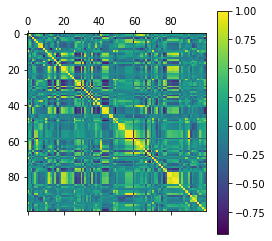

In [7]:
# Show the correlation between the Coefficients
def getcorr (columns):
    corr_coeffs = communitydata[columns].corr()
    return corr_coeffs
new_corr = getcorr(communitydata.columns)
plt.figure()
plt.matshow(new_corr)
plt.colorbar()

In [8]:
def removehighcorrVar (corr_coeffs, data_columns):
    columns = np.full((corr_coeffs.shape[0],), True, dtype=bool)
    for i in range(corr_coeffs.shape[0]):
        for j in range(i+1, corr_coeffs.shape[0]):
            if corr_coeffs.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = data_columns[columns]
    return selected_columns
new_columns = removehighcorrVar(new_corr, X.columns)

<Figure size 432x288 with 0 Axes>

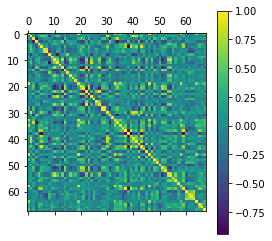

In [9]:
new_corr = getcorr(new_columns)
plt.figure()
plt.matshow(new_corr)
plt.colorbar()

Model 1 RMSE = 0.13800293289151652
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     37.88
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          1.97e-244
Time:                        14:31:00   Log-Likelihood:                 766.64
No. Observations:                1195   AIC:                            -1393.
Df Residuals:                    1125   BIC:                            -1037.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

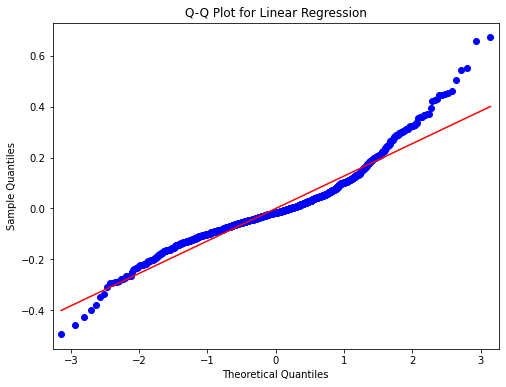

In [10]:
X = X[new_columns]
trainingdata(X, y)

# Lasso Regression

In [11]:
def standardise(data):
  """ Standardise/Normalise data to have zero mean and unit variance

  Args:
    data (np.array):
      data we want to standardise (usually covariates)

    Returns:
      Standardised data, mean of data, standard deviation of data
  """
  mu = np.mean(data, axis=0)
  sigma = np.std(data, axis=0)

  scaled = (preprocessing.scale(data))
  return scaled, mu, sigma

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
y_train = np.array(y_train, dtype=np.float64)
X_train = np.array(X_train, dtype=np.float64)
Y_val = np.array(Y_val, dtype=np.float64)
X_val = np.array(X_val, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)


X_train_std, mu_train, sigma_train = standardise(X_train)
Y_train_std, mu_test, sigma_test = standardise(y_train)
X_val_std = (X_val - mu_train)/sigma_train
Y_val_std = (Y_val - mu_test)/sigma_test
X_test_std = (X_test - mu_train)/sigma_train
Y_test_std = (y_test - mu_test)/sigma_test

In [13]:
def evaluate_regularisation(x_train, y_train, x_val, y_val, x_test, y_test,
                            mu_test, sigma_test, alpha_list, L1_L2):
  # the L1_L2 variable determines if we will be using ridge or lasso
  # Ridge: L1_L2 = 0
  # Lasso: L1_L2 = 1
  # create the model
  model = sm.OLS(y_train, sm.add_constant(x_train))
  best_rmse = 10e12
  best_alpha = []
  rmse_val = []
  rmse_train = []
  best_coeffs = []
  for alpha in alpha_list:
    model_cross_fit = model.fit_regularized(alpha=alpha, L1_wt=L1_L2)
    train_pred = model_cross_fit.predict(sm.add_constant(x_train))
    val_pred = model_cross_fit.predict(sm.add_constant(x_val))
    # want to append the rmse value to a list, as will plot all values later on
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    rmse_val.append(np.sqrt(mean_squared_error(y_val, val_pred)))
    # if this is the model with the lowest RMSE, lets save it
    # the [-1] index says get the last value from the list (which is the most recent RMSE)
    if rmse_val[-1] < best_rmse:
      best_rmse = rmse_val[-1]
      best_alpha = alpha
      best_coeffs = model_cross_fit.params
      
  print('Best values on Validation Data set')
  model_rescaled = sm.OLS(y_train * sigma_test + mu_test,
                          sm.add_constant(x_train* sigma_test + mu_test))
  model_best_fit = model_rescaled.fit_regularized(alpha=alpha * sigma_test, L1_wt=1)

  # extract the gradient and the bias from the coefficients
  # The reshape will make sure the slope is a column vector
  slope = np.array(best_coeffs[1:]).reshape(-1, 1)
  # the intercept coefficient is the last index variable, which was included with the
  # sm.add_constant() method
  intercept = best_coeffs[0]
  # use the @ operator to perform vector/matrix multiplication
  pred_val_rescaled = (x_val @ slope + intercept) * sigma_test + mu_test
  pred_train_rescaled = (x_train @ slope + intercept) * sigma_test + mu_test
  best_r2 = r_squared(y_train * sigma_test + mu_test, pred_train_rescaled)
  best_adj_r2 = adj_r2(y_train * sigma_test + mu_test, pred_train_rescaled,
                           x_train.shape[0], x_train.shape[1]) 
  best_val_rmse = np.sqrt(mean_squared_error(y_val* sigma_test + mu_test, pred_val_rescaled))
  cv_r2_scores_rf = cross_val_score(model_best_fit, X_val, Y_val, cv=5,scoring='r2')

  print('Best Alpha = {}'.format(best_alpha))
  print('Best R Squared = {}'.format(best_r2))
  print('Best Adjusted = {}'.format(best_adj_r2))
  print('Best RMSE (val) = {}'.format(best_val_rmse))
  print('Best slope = {}'.format(slope))
  print('Best Intercept = {}'.format(intercept))

  fig, axs = plt.subplots(3, figsize=(15,15))
  axs[0].plot(np.array(alpha_list), rmse_train)
  axs[0].plot(np.array(alpha_list), rmse_val)
  axs[0].legend(['Training', 'Validation'])
  axs[0].set_title('RMSE vs Lambda')
  axs[0].set_xlabel('Lambda')
  axs[0].set_ylabel('RMSE')    
  
  axs[1].plot((y_test*sigma_test + mu_test))
  axs[1].plot(model_best_fit.predict(sm.add_constant(x_test* sigma_test + mu_test)))
  axs[1].legend(['Actual', 'Predicted'])
  axs[1].set_title('Test Set Performance')
  

  train_pred = model_cross_fit.predict(sm.add_constant(x_val))
  resid = y_val - train_pred
  sm.qqplot(resid, ax=axs[2], line='s')
  axs[2].set_title('Q-Q Plot for Linear Regression')

In [14]:
def r_squared(actual, predicted):
  r2 = r2_score(actual, predicted)
  return r2

In [15]:
def rmse(actual, pred):
  return np.sqrt(mean_squared_error(actual, pred))

In [16]:
def adj_r2(actual, predicted, n, p):
  r2 = r2_score(actual, predicted)
  adjr2 = 1 - (1 - r2) * (n - 1) / (n - p - 1);
  return adjr2

Best values on Validation Data set
Best Alpha = 0.002002002002002002
Best R Squared = 0.6897694792003137
Best Adjusted = 0.670742007257933
Best RMSE (val) = 0.13837101668159266
Best slope = [[-0.07558018]
 [ 0.06084178]
 [ 0.19651562]
 [-0.07008711]
 [ 0.        ]
 [ 0.05002314]
 [ 0.02169975]
 [ 0.        ]
 [ 0.11305828]
 [ 0.05569261]
 [ 0.        ]
 [-0.10667633]
 [ 0.        ]
 [-0.11886227]
 [ 0.07630727]
 [-0.03513579]
 [ 0.        ]
 [-0.01386204]
 [ 0.0373184 ]
 [ 0.03096632]
 [-0.03872259]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.14132118]
 [-0.01747817]
 [ 0.        ]
 [ 0.        ]
 [ 0.0881451 ]
 [ 0.        ]
 [ 0.0099816 ]
 [-0.02443423]
 [-0.0568033 ]
 [-0.06023581]
 [ 0.29622206]
 [ 0.        ]
 [ 0.03360479]
 [ 0.04145737]
 [ 0.        ]
 [-0.04427587]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.03806238]
 [ 0.        ]
 [ 0.18507106]
 [ 0.03257651]
 [ 0.05852813]
 [-0.02596389]
 [-0.00645338]
 [ 0.        ]
 [ 0.        ]


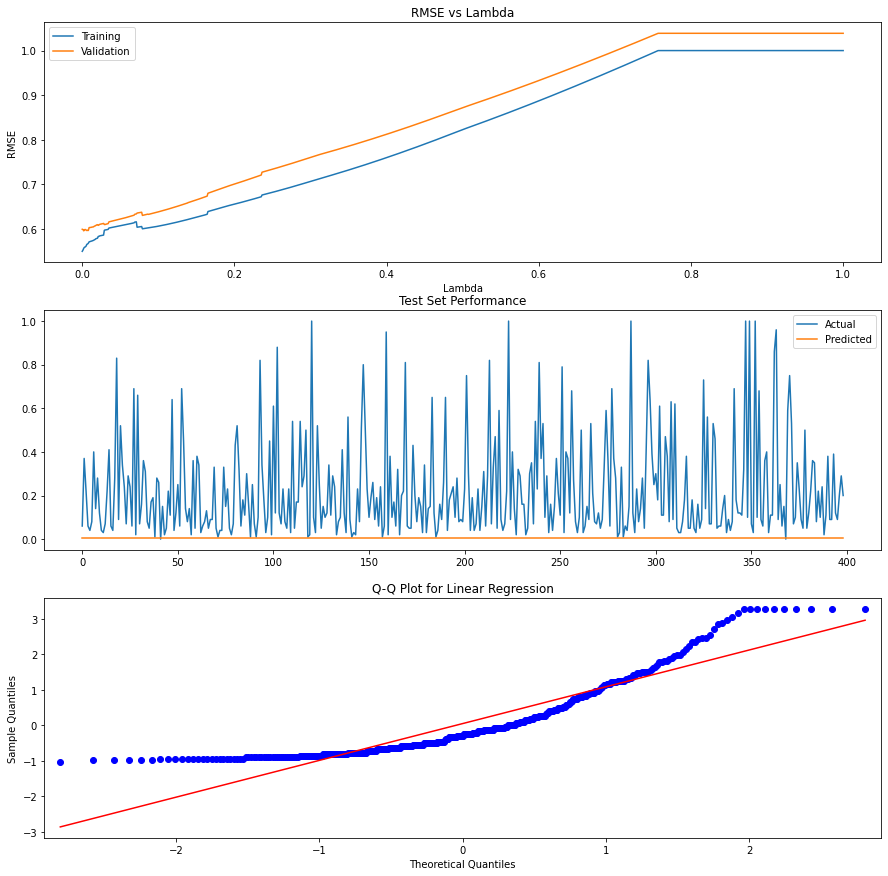

In [20]:
alpha_list = np.linspace(0, 1.0, 1000)
#Lasso Regression
evaluate_regularisation(X_train_std, Y_train_std, X_val_std, Y_val_std, X_test_std, Y_test_std,
                        mu_test, sigma_test, alpha_list, 1)

Best values on Validation Data set
Best Alpha = 0.0
Best R Squared = 0.6990799990406223
Best Adjusted = 0.6806235723151138
Best RMSE (val) = 0.1380029328915162
Best slope = [[-8.00214906e-02]
 [ 6.65768611e-02]
 [ 2.34302095e-01]
 [ 2.42779303e-02]
 [ 2.49604849e-02]
 [ 3.15563181e-02]
 [ 1.38544669e-01]
 [-1.26349011e-01]
 [ 8.92179459e-02]
 [ 6.90819529e-02]
 [-1.61790371e-02]
 [-1.40585687e-01]
 [ 1.29397460e-02]
 [-2.01006086e-01]
 [ 1.04081696e-01]
 [-5.08946706e-02]
 [-8.49890817e-03]
 [-1.96233423e-02]
 [ 4.35316333e-02]
 [ 3.22996802e-02]
 [ 1.12645639e-02]
 [-1.29421292e-01]
 [-2.39493711e-02]
 [ 2.64524012e-02]
 [ 1.84621213e-02]
 [ 1.99264416e-01]
 [-9.16367473e-03]
 [-1.69402965e-02]
 [ 4.88537692e-02]
 [ 2.18240076e-01]
 [-1.82491656e-01]
 [-7.07579374e-02]
 [-3.78677341e-02]
 [-5.80175221e-02]
 [-1.05705983e-01]
 [ 3.13118999e-01]
 [-1.24552318e-02]
 [ 5.08089292e-02]
 [-3.10041439e-02]
 [-9.42373465e-02]
 [-2.20752739e-01]
 [ 1.13599957e-02]
 [-8.77393826e-02]
 [-4.34146

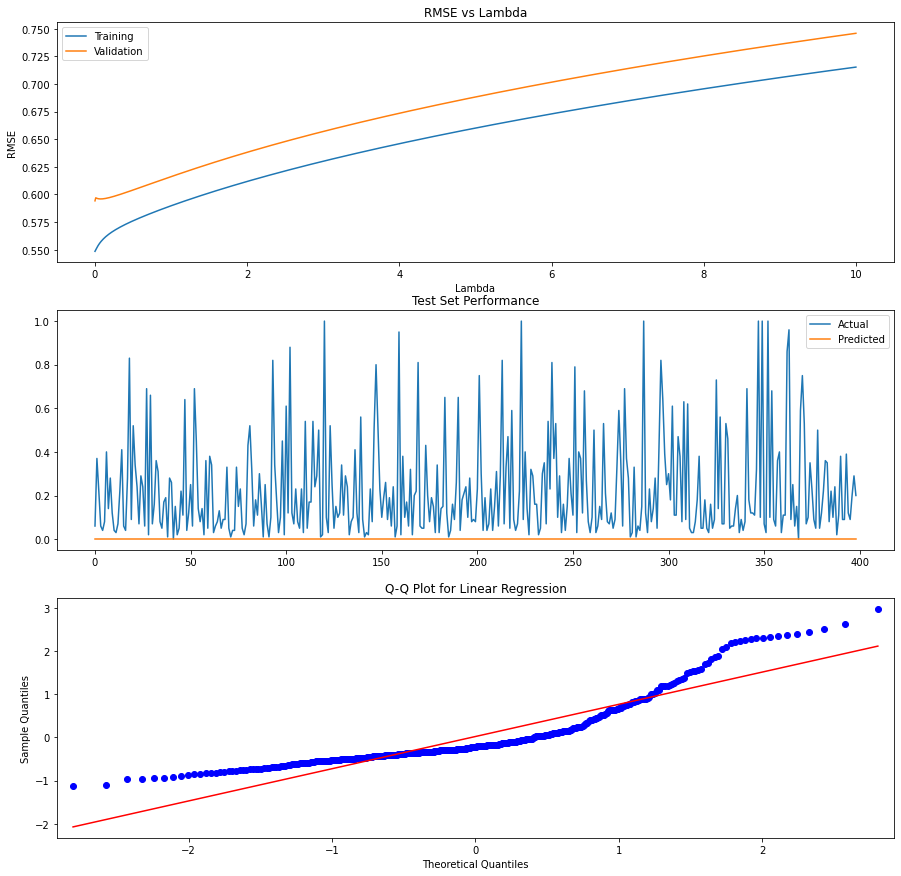

In [19]:
#Ridge Regression
alpha_list = np.linspace(0, 10.0, 1000)

evaluate_regularisation(X_train_std, Y_train_std, X_val_std, Y_val_std, X_test_std, Y_test_std,
                        mu_test, sigma_test, alpha_list, 0)